<a href="https://colab.research.google.com/github/DaviAlefe/GeoProb/blob/master/projeto_pereira.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
infile = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dados_brutos.csv')
df = pd.DataFrame(infile)
df

,ponto,x,y,mag,k,u,th
0,1,682580,7195723,14.00,2.1,2.4,9.4
1,2,682796,7196181,26.00,2.1,1.8,11.8
2,3,682841,7196262,0.03,2.2,2.4,8.7
3,4,682767,7196566,27.00,2.2,2.4,10.9
4,5,682513,7196561,0.05,2.2,1.7,9.8
...,...,...,...,...,...,...,...
227,228,675657,7201341,219.00,2.1,2.7,9.2
228,229,674401,7200840,22.00,2.0,2.1,10.6
229,230,672926,7200967,13.00,1.9,2.6,9.4
230,231,673022,7200856,14.00,2.0,3.0,7.9


In [ ]:
data = df.iloc[:,1:7]
data

,x,y,mag,k,u,th
0,682580,7195723,14.00,2.1,2.4,9.4
1,682796,7196181,26.00,2.1,1.8,11.8
2,682841,7196262,0.03,2.2,2.4,8.7
3,682767,7196566,27.00,2.2,2.4,10.9
4,682513,7196561,0.05,2.2,1.7,9.8
...,...,...,...,...,...,...
227,675657,7201341,219.00,2.1,2.7,9.2
228,674401,7200840,22.00,2.0,2.1,10.6
229,672926,7200967,13.00,1.9,2.6,9.4
230,673022,7200856,14.00,2.0,3.0,7.9


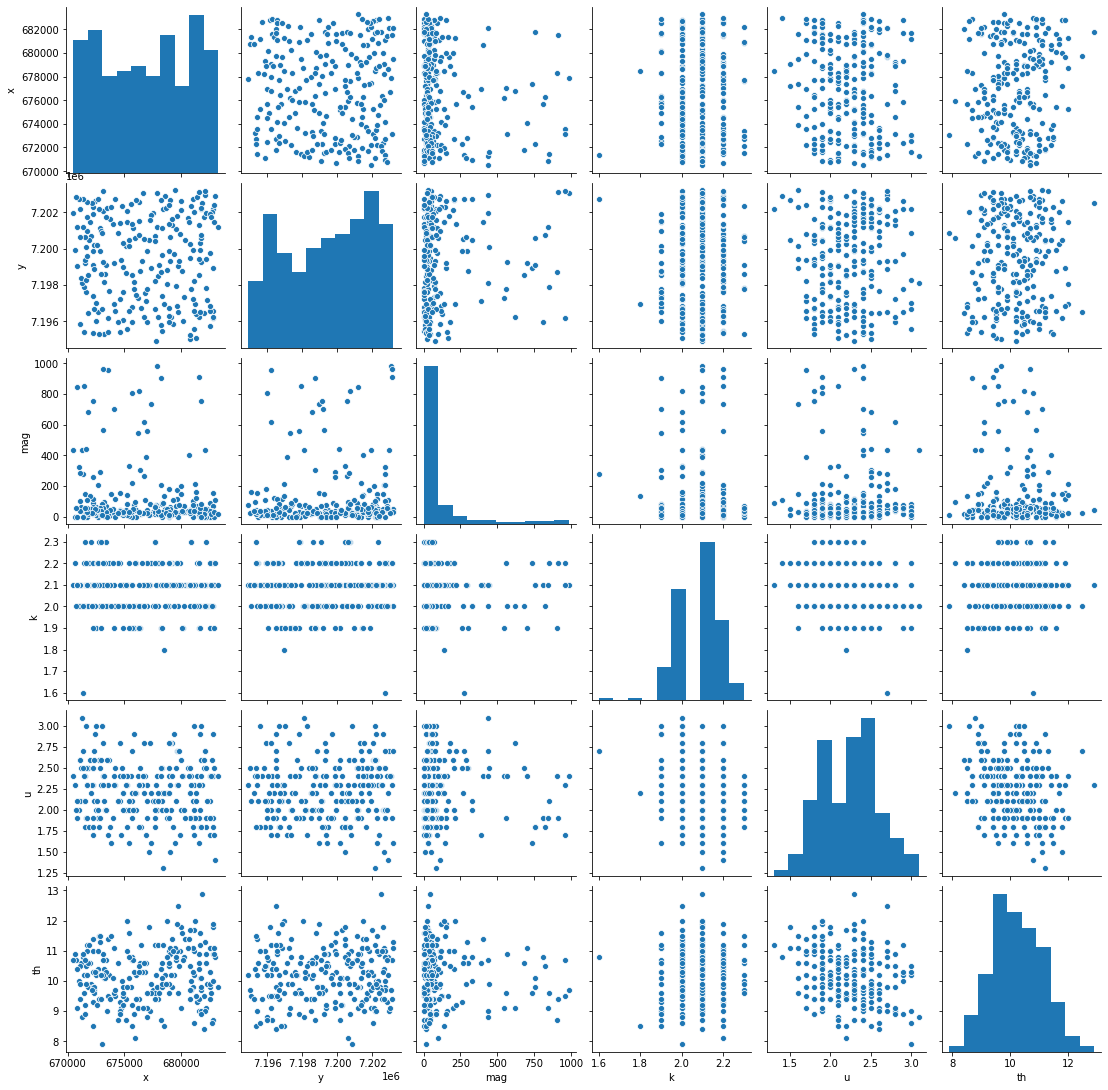

In [ ]:
fig = sns.pairplot(data)

In [ ]:
vertices = {'Noroeste': [670510, 7203205],
'Nordeste': [683274.88, 7203205],
'Sudoeste': [670510, 7194933.02],
'Sudeste': [683274.88, 7194933.02]}

In [ ]:
deltax = vertices['Sudeste'][0]-vertices['Sudoeste'][0]
deltay = vertices['Nordeste'][1]-vertices['Sudeste'][1]

In [ ]:
#Preparo dos dados para regressão de mag. Deslocamento da origem para os mínimos de x e y e reescala para y e mag ficar entre 0 e 1

X = pd.DataFrame(np.zeros(shape=(len(data),2)))
X[0] = (1/deltax)*(data.x - vertices['Sudoeste'][0])
X[1] = (1/deltay)*(data.y - vertices['Sudoeste'][1])
y = (1/max(data.mag))*data.mag

In [ ]:
verticesx = [vertices['Nordeste'][0],vertices['Noroeste'][0],vertices['Sudeste'][0],vertices['Sudoeste'][0]]
verticesy = [vertices['Nordeste'][1],vertices['Noroeste'][1],vertices['Sudeste'][1],vertices['Sudoeste'][1]]

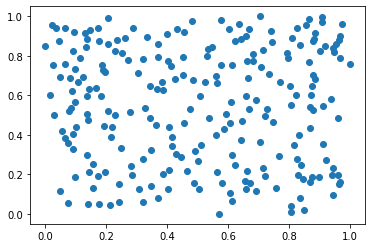

In [ ]:
plt.scatter(X[0],X[1])

In [ ]:
#separação treino teste
from sklearn.model_selection import train_test_split

Xtr, Xte, ytr, yte = train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#regressões polinomiais com grau 1 a 50

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

mse_treino = []
mse_teste = []

for p in range(1,51):
    poly = PolynomialFeatures(degree=p)
    Xp = poly.fit_transform(Xtr)
    reg = LinearRegression()
    reg.fit(Xp, ytr)
    y_pred = reg.predict(Xp)
    mse_treino.append(mean_absolute_error(ytr, y_pred))
    
    Xp = poly.fit_transform(Xte)
    y_pred = reg.predict(Xp)
    mse_teste.append(mean_absolute_error(yte, y_pred))

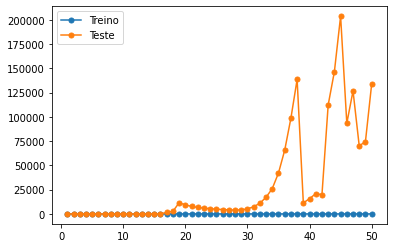

In [ ]:
#Plot dos erros quadráticos no conjunto de treino e de teste

plt.plot(range(1, len(mse_treino)+1), mse_treino, marker='.', ms=10, label='Treino')
plt.plot(range(1, len(mse_teste)+1), mse_teste, marker='.', ms=10, label='Teste')
plt.legend()

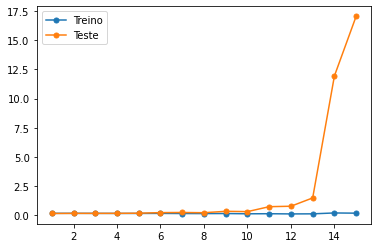

In [ ]:
#Plot dos erros quadráticos no conjunto de treino e de teste no intervalo 1 a 15

plt.plot(range(1, 16), mse_treino[0:15], marker='.', ms=10, label='Treino')
plt.plot(range(1, 16), mse_teste[0:15], marker='.', ms=10, label='Teste')
plt.legend()

In [ ]:
index_min = np.where(mse_teste == np.amin(mse_teste))
print("Melhor regressão é a de grau ", int(index_min[0])+1,", com erro médio de ",round(100*min(mse_teste),3),"% em relação ao valor mais alto de mag")

Melhor regressão é a de grau  1 , com erro médio de  13.244 % em relação ao valor mais alto de mag


In [ ]:
class BestRegressor():

  def BestPolyRegressor (self, X, y):
    from sklearn.model_selection import KFold
    #regressões polinomiais com grau 1 a 50
    from sklearn.metrics import mean_squared_error
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    kf = KFold(shuffle=True, random_state=0, n_splits=10)

    mse_treino = []
    mse_teste = []

    for p in range(1,51):
        poly = PolynomialFeatures(degree=p)
        Xp = poly.fit_transform(Xtr)

        reg = LinearRegression()
        reg.fit(Xp, ytr)
        y_pred = reg.predict(Xp)
        mse_treino.append(mean_squared_error(ytr, y_pred))
        
        Xp = poly.fit_transform(Xte)
        y_pred = reg.predict(Xp)
        mse_teste.append(mean_squared_error(yte, y_pred))
          for Itr, Ite in kf.split(Xp):
            X_tr, X_te, y_tr, y_te = X_ply[Itr,:], X_ply[Ite,:], y[Itr], y[Ite]
            
            clf.fit(X_tr, y_tr)
            y_pred = clf.predict(X_te)

            acc_soma += accuracy_score(y_te, y_pred)    
            acc_med = acc_soma/kf.n_splits
